<a href="https://colab.research.google.com/github/Arthurads-rj/analise-dados-portfolio/blob/main/Analise_covid_19_em_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória sobre a Covid-19 em 2021
Nesse projeto, estarei fazendo uma análise exploratória dos dados disponibilizados pelo governo no site https://covid.saude.gov.br.

Algumas perguntas interessantes que resolvi abordar nesse projeto foram:
- Qual foi o total de casos registrados no ano de 2021 sem adicionar aos casos acumulados?
- E qual foi o total de óbitos?
- Quais são as áreas que foram mais afetadas pela doença?


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Tratamento de Dados

Essa foi a parte mais interessante de todo o projeto, já que por ser um dataset enorme que é atualizado constantemente, é de se imaginar que iriam passar erros ou dados ilegíveis, então me esforcei ao máximo para tratar os dados da melhor forma possível

In [126]:
covid19_2021_p1 = pd.read_csv('../content/drive/MyDrive/Planilhas/covid 19/HIST_PAINEL_COVIDBR_2021_Parte1_25fev2022.csv', sep=';', index_col='data', parse_dates=True)
covid19_2021_p2 = pd.read_csv('../content/drive/MyDrive/Planilhas/covid 19/HIST_PAINEL_COVIDBR_2021_Parte2_25fev2022.csv', sep=';', index_col='data', parse_dates=True)

covid19_2021_p1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,NaN
2021-01-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7700578.0,0,195411,0,6756284.0,748883.0,NaN
2021-01-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,NaN
2021-01-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7716405.0,0,195725,0,6769420.0,751260.0,NaN
2021-01-03,Brasil,NaN,NaN,76,NaN,NaN,NaN,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,NaN


In [127]:
covid19_2021_p2.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-07-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,26,210147125.0,18622304,65163,520095,2029,16858632.0,1180443.0,NaN
2021-07-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,26,210147125.0,18622304,0,520095,0,16931272.0,1170937.0,NaN
2021-07-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,26,210147125.0,18687469,65165,521952,1857,16931272.0,1170937.0,NaN
2021-07-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,26,210147125.0,18687469,0,521952,0,16989351.0,1176166.0,NaN
2021-07-03,Brasil,NaN,NaN,76,NaN,NaN,NaN,26,210147125.0,18742025,54556,523587,1635,16989351.0,1176166.0,NaN


Concatenei os dados, que estavam divididos com base em semestres.

In [128]:
covid19 = pd.concat([covid19_2021_p1, covid19_2021_p2])

covid19.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,NaN
2021-01-01,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7700578.0,0,195411,0,6756284.0,748883.0,NaN
2021-01-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,NaN
2021-01-02,Brasil,NaN,NaN,76,NaN,NaN,NaN,53,210147125.0,7716405.0,0,195725,0,6769420.0,751260.0,NaN
2021-01-03,Brasil,NaN,NaN,76,NaN,NaN,NaN,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,NaN


Exibi as informações das colunas, para saber com quais informações poderia trabalhar

In [129]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2051138 entries, 2021-01-01 to 2021-12-31
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   semanaEpi               int64  
 8   populacaoTCU2019        float64
 9   casosAcumulado          float64
 10  casosNovos              int64  
 11  obitosAcumulado         int64  
 12  obitosNovos             int64  
 13  Recuperadosnovos        float64
 14  emAcompanhamentoNovos   float64
 15  interior/metropolitana  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 266.0+ MB


### Início do tratamento

Eu percebi que o dataset tinha uma divisão um pouco inusitada para mim: Todas as regiões do Brasil tinham uma quantidade específica de dados que não tinham municípios registrados. 

Depois de uns testes eu entendi que isso era como uma visão geral de região.


In [130]:
regioes_gerais = covid19[covid19['municipio'].isna()]
regioes_gerais.dropna(axis=0, subset=['populacaoTCU2019'], inplace=True)
regioes_gerais = regioes_gerais.fillna('Desconhecido')

regioes_gerais.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Brasil,Desconhecido,Desconhecido,76,Desconhecido,Desconhecido,Desconhecido,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,Desconhecido
2021-01-01,Brasil,Desconhecido,Desconhecido,76,Desconhecido,Desconhecido,Desconhecido,53,210147125.0,7700578.0,0,195411,0,6756284.0,748883.0,Desconhecido
2021-01-02,Brasil,Desconhecido,Desconhecido,76,Desconhecido,Desconhecido,Desconhecido,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,Desconhecido
2021-01-02,Brasil,Desconhecido,Desconhecido,76,Desconhecido,Desconhecido,Desconhecido,53,210147125.0,7716405.0,0,195725,0,6769420.0,751260.0,Desconhecido
2021-01-03,Brasil,Desconhecido,Desconhecido,76,Desconhecido,Desconhecido,Desconhecido,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,Desconhecido


Aqui é onde eu fiz a separação das regiões gerais para os dados de cada município das regiões.

In [131]:
regioes_municipios = covid19[covid19['municipio'].notnull()]
regioes_municipios.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,53,22945.0,1291.0,3,16,0,NaN,NaN,0.0
2021-01-02,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,53,22945.0,1307.0,16,16,0,NaN,NaN,0.0
2021-01-03,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1326.0,19,16,0,NaN,NaN,0.0
2021-01-04,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1333.0,7,16,0,NaN,NaN,0.0
2021-01-05,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1342.0,9,16,0,NaN,NaN,0.0


In [132]:
sudeste = regioes_municipios.loc[regioes_municipios['regiao'] == 'Sudeste']
sudeste.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Sudeste,MG,Abadia dos Dourados,31,310010.0,31074.0,PATROCINIO / MONTE CARMELO,53,6989.0,110.0,0,1,0,NaN,NaN,0.0
2021-01-02,Sudeste,MG,Abadia dos Dourados,31,310010.0,31074.0,PATROCINIO / MONTE CARMELO,53,6989.0,110.0,0,1,0,NaN,NaN,0.0
2021-01-03,Sudeste,MG,Abadia dos Dourados,31,310010.0,31074.0,PATROCINIO / MONTE CARMELO,1,6989.0,110.0,0,1,0,NaN,NaN,0.0
2021-01-04,Sudeste,MG,Abadia dos Dourados,31,310010.0,31074.0,PATROCINIO / MONTE CARMELO,1,6989.0,110.0,0,1,0,NaN,NaN,0.0
2021-01-05,Sudeste,MG,Abadia dos Dourados,31,310010.0,31074.0,PATROCINIO / MONTE CARMELO,1,6989.0,110.0,0,1,0,NaN,NaN,0.0


In [133]:
nordeste = regioes_municipios.loc[regioes_municipios['regiao'] == 'Nordeste']
nordeste.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,53,112445.0,3741.0,0,104,0,NaN,NaN,0.0
2021-01-02,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,53,112445.0,3741.0,0,104,0,NaN,NaN,0.0
2021-01-03,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,1,112445.0,3741.0,0,104,0,NaN,NaN,0.0
2021-01-04,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,1,112445.0,3741.0,0,104,0,NaN,NaN,0.0
2021-01-05,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,1,112445.0,3741.0,0,104,0,NaN,NaN,0.0


In [134]:
sul = regioes_municipios.loc[regioes_municipios['regiao'] == 'Sul']
sul.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Sul,PR,Abatiá,41,410010.0,41018.0,18ª RS CORNELIO PROCOPIO,53,7457.0,99.0,0,1,0,NaN,NaN,0.0
2021-01-02,Sul,PR,Abatiá,41,410010.0,41018.0,18ª RS CORNELIO PROCOPIO,53,7457.0,99.0,0,1,0,NaN,NaN,0.0
2021-01-03,Sul,PR,Abatiá,41,410010.0,41018.0,18ª RS CORNELIO PROCOPIO,1,7457.0,109.0,10,1,0,NaN,NaN,0.0
2021-01-04,Sul,PR,Abatiá,41,410010.0,41018.0,18ª RS CORNELIO PROCOPIO,1,7457.0,110.0,1,1,0,NaN,NaN,0.0
2021-01-05,Sul,PR,Abatiá,41,410010.0,41018.0,18ª RS CORNELIO PROCOPIO,1,7457.0,118.0,8,1,0,NaN,NaN,0.0


In [135]:
norte = regioes_municipios.loc[regioes_municipios['regiao'] == 'Norte']
norte.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,53,22945.0,1291.0,3,16,0,NaN,NaN,0.0
2021-01-02,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,53,22945.0,1307.0,16,16,0,NaN,NaN,0.0
2021-01-03,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1326.0,19,16,0,NaN,NaN,0.0
2021-01-04,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1333.0,7,16,0,NaN,NaN,0.0
2021-01-05,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,1,22945.0,1342.0,9,16,0,NaN,NaN,0.0


In [136]:
centro_oeste = regioes_municipios.loc[regioes_municipios['regiao'] == 'Centro-Oeste']
centro_oeste.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Centro-Oeste,MS,Água Clara,50,500020.0,50004.0,TRES LAGOAS,53,15522.0,583.0,10,5,1,NaN,NaN,0.0
2021-01-02,Centro-Oeste,MS,Água Clara,50,500020.0,50004.0,TRES LAGOAS,53,15522.0,583.0,0,5,0,NaN,NaN,0.0
2021-01-03,Centro-Oeste,MS,Água Clara,50,500020.0,50004.0,TRES LAGOAS,1,15522.0,583.0,0,5,0,NaN,NaN,0.0
2021-01-04,Centro-Oeste,MS,Água Clara,50,500020.0,50004.0,TRES LAGOAS,1,15522.0,587.0,4,5,0,NaN,NaN,0.0
2021-01-05,Centro-Oeste,MS,Água Clara,50,500020.0,50004.0,TRES LAGOAS,1,15522.0,587.0,0,5,0,NaN,NaN,0.0


Resolvi me basear nas datas e em uma região só, que no caso foi o Nordeste, para afunilar os dados e ver melhor quais eram os problemas.
Um dos problemas era que as regiões e estados estavam duplicados mas sem registro nenhum de população ou casos acumulados, porém alguns mostravam casos novos. Então descartei esses dados pois não iriam ajudar na minha análise.

In [137]:
regioes_gerais.dropna(axis=0, subset=['populacaoTCU2019'], inplace=True)
rdata = regioes_gerais.loc[regioes_gerais.index == '2021-01-01']
rdata = rdata.loc[rdata['regiao'] == 'Nordeste']
rdata

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Nordeste,MA,Desconhecido,21,Desconhecido,Desconhecido,Desconhecido,53,7075181.0,200959.0,21,4506,6,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,PI,Desconhecido,22,Desconhecido,Desconhecido,Desconhecido,53,3273227.0,143179.0,507,2840,3,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,CE,Desconhecido,23,Desconhecido,Desconhecido,Desconhecido,53,9132078.0,335992.0,901,9993,3,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,RN,Desconhecido,24,Desconhecido,Desconhecido,Desconhecido,53,3506853.0,118353.0,270,2993,0,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,PB,Desconhecido,25,Desconhecido,Desconhecido,Desconhecido,53,4018127.0,167062.0,578,3680,8,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,PE,Desconhecido,26,Desconhecido,Desconhecido,Desconhecido,53,9557071.0,222993.0,827,9666,12,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,AL,Desconhecido,27,Desconhecido,Desconhecido,Desconhecido,53,3337357.0,105091.0,273,2496,7,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,SE,Desconhecido,28,Desconhecido,Desconhecido,Desconhecido,53,2298696.0,113544.0,1039,2492,8,Desconhecido,Desconhecido,Desconhecido
2021-01-01,Nordeste,BA,Desconhecido,29,Desconhecido,Desconhecido,Desconhecido,53,14873064.0,494684.0,1284,9159,30,Desconhecido,Desconhecido,Desconhecido


Aqui é a soma de todos os casos novos dos dados dos Estados do Nordeste

In [138]:
rdata['casosNovos'].sum()

5700

A seguir, usei os dados do Nordeste que tinham múnicipio registrados para comparar, e ver se houve alguma perda de dados

In [139]:
nordeste_data = nordeste.loc[nordeste.index == '2021-01-01']
nordeste_data.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-01-01,Nordeste,MA,Açailândia,21,210005.0,21001.0,ACAILANDIA,53,112445.0,3741.0,0,104,0,NaN,NaN,0.0
2021-01-01,Nordeste,MA,Afonso Cunha,21,210010.0,21005.0,CAXIAS,53,6524.0,152.0,0,2,0,NaN,NaN,0.0
2021-01-01,Nordeste,MA,Água Doce do Maranhão,21,210015.0,21006.0,CHAPADINHA,53,12571.0,657.0,0,6,0,NaN,NaN,0.0
2021-01-01,Nordeste,MA,Alcântara,21,210020.0,21016.0,SAO LUIS,53,22097.0,202.0,0,8,0,NaN,NaN,1.0
2021-01-01,Nordeste,MA,Aldeias Altas,21,210030.0,21005.0,CAXIAS,53,26532.0,947.0,0,11,0,NaN,NaN,0.0


### Conclusão do tratamento
E infelizmente houve perda de dados. Estimei que há uma perda de 200~300 dados por região depois desse tratamento.
Mas pelo menos não tem excesso de dados sem valor no dataset.

In [140]:
nordeste_data['casosNovos'].sum()

5596

## Análise

A seguir é onde começa as análise que fiz.

fiz uma função para conseguir renomear as colunas dos agrupamentos que fiz de cada região.

e abaixo tem todo o código que usei para organizar os dados, para depois transferir para gráficos.

In [141]:
#Fiz essa função para facilitar o processo de mudar os nomes das colunas, já que
#não posso utilizar funções do pandas para criar funções próprias
def nomeColunas(nome):
  nome.columns = ['_'.join(col).strip() for col in nome.columns.values]

### Casos de Infecção

Conduzi uma divisão dos dados, entre as regiões de maneira generalizada (falando do Sudeste como um todo, por exemplo), e depois falando de Estado da região.

Abaixo estão as tabelas mostrando cada região e sua contagem de novos casos de infecção.

In [142]:
#Agrupar os dados
regioes_contagem = regioes_gerais[['regiao', 'casosNovos']].groupby('regiao').agg(['sum', 'mean', 'max', 'median'])
nomeColunas(regioes_contagem)
#Renomear as colunas
regioes_contagem = regioes_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021', 'casosNovos_mean':'Média de Casos', 'casosNovos_max': 'Máx. casos em um dia', 'casosNovos_median': 'Mediana'})
#Organizar por ordem descrescente
regioes_contagem = regioes_contagem.sort_values(by='Total de casos de 2021', ascending=False)
regioes_contagem

,Total de casos de 2021,Média de Casos,Máx. casos em um dia,Mediana
regiao,,,,
Brasil,14611548,25724.556338,150106,13156.5
Sudeste,5974702,4092.261644,105700,1912.5
Nordeste,3053939,929.661796,36374,507.0
Sul,2990131,2730.713242,64036,1821.0
Centro-Oeste,1528015,1046.585616,6816,833.5
Norte,1064761,416.736204,5009,220.0


In [143]:
#Fiz um slice das regiões acima, removendo o Brasil para não causar discrepância
#Nos gráficos
regioes_int = regioes_contagem[1:]

In [144]:
sudeste_contagem = sudeste[['estado', 'casosNovos']].groupby('estado').agg(['sum'])
nomeColunas(sudeste_contagem)
sudeste_contagem = sudeste_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021'})
sudeste_contagem = sudeste_contagem.sort_values(by='Total de casos de 2021', ascending=False)
sudeste_contagem

,Total de casos de 2021
estado,
SP,2993896
MG,1679936
RJ,918176
ES,378481


In [145]:
nordeste_contagem = nordeste[['estado', 'casosNovos']].groupby('estado').agg(['sum'])
nomeColunas(nordeste_contagem)
nordeste_contagem = nordeste_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021'})
nordeste_contagem = nordeste_contagem.sort_values(by='Total de casos de 2021', ascending=False)
nordeste_contagem

,Total de casos de 2021
estado,
BA,772189
CE,616773
PE,423515
PB,297851
RN,269119
PI,191768
MA,169707
SE,166025
AL,137270


In [146]:
norte_contagem = norte[['estado', 'casosNovos']].groupby('estado').agg(['sum'])
nomeColunas(norte_contagem)
norte_contagem = norte_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021'})
norte_contagem = norte_contagem.sort_values(by='Total de casos de 2021', ascending=False)
norte_contagem

,Total de casos de 2021
estado,
PA,331923
AM,232800
RO,187502
TO,145200
RR,58988
AP,58780
AC,46764


In [147]:
sul_contagem = sul[['estado', 'casosNovos']].groupby('estado').agg(['sum'])
nomeColunas(sul_contagem)
sul_contagem = sul_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021'})
sul_contagem = sul_contagem.sort_values(by='Total de casos de 2021', ascending=False)
sul_contagem

,Total de casos de 2021
estado,
PR,1178435
RS,1057443
SC,761092


In [148]:
co_contagem = centro_oeste[['estado', 'casosNovos']].groupby('estado').agg(['sum'])
nomeColunas(co_contagem)
co_contagem = co_contagem.rename(columns={'casosNovos_sum': 'Total de casos de 2021'})
co_contagem = co_contagem.sort_values(by='Total de casos de 2021', ascending=False)
co_contagem

,Total de casos de 2021
estado,
GO,638836
MT,374425
DF,268110
MS,246644


Aqui eu separei especificamente as regiões e casos novos para poder criar um outro conjunto de dados, onde as regiões estariam como colunas, para eu poder criar o gráfico temporal.

In [267]:
viz_datas = regioes_gerais[['regiao', 'casosNovos']]
#Usei essa função para mudar a estrutura do conjunto de dados
viz_datas = viz_datas.pivot_table(values='casosNovos', index=viz_datas.index, columns='regiao', aggfunc='first')
viz_datas = viz_datas.drop(labels='Brasil', axis=1)
viz_datas.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
data,,,,,
2021-01-01,989,21,270,3975,1757
2021-01-02,611,17,434,2418,1292
2021-01-03,556,41,473,1370,1700
2021-01-04,333,76,291,1432,1726
2021-01-05,1320,162,657,4588,4748


### Gráficos: Casos de infecção

Abaixo, temos um gráfico temporal de todos os novos casos registrados ao longo do ano.

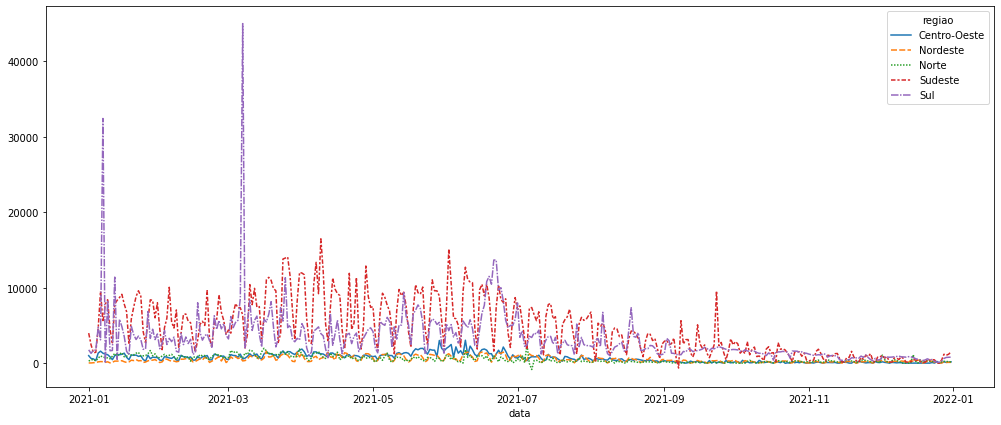

In [268]:
plt.figure(figsize=(17,7))
sns.lineplot(data=viz_datas)

E a seguir, graficos isolando as regiões do Brasil.

Text(0.5, 1.0, 'Regiões do Brasil')

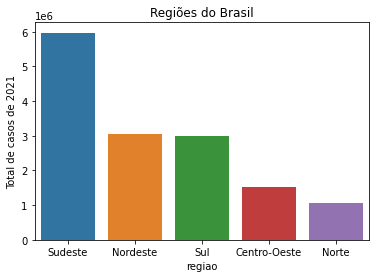

In [149]:
sns.barplot(x=regioes_int.index, y=regioes_int['Total de casos de 2021']).set_title('Regiões do Brasil')

Text(0.5, 1.0, 'Sudeste')

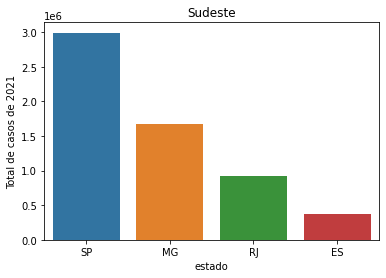

In [150]:
sns.barplot(x=sudeste_contagem.index, y=sudeste_contagem['Total de casos de 2021']).set_title('Sudeste')

Text(0.5, 1.0, 'Nordeste')

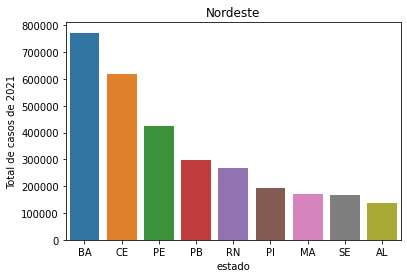

In [151]:
sns.barplot(x=nordeste_contagem.index, y=nordeste_contagem['Total de casos de 2021']).set_title('Nordeste')

Text(0.5, 1.0, 'Norte')

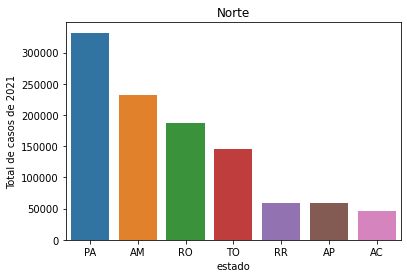

In [152]:
sns.barplot(x=norte_contagem.index, y=norte_contagem['Total de casos de 2021']).set_title('Norte')

Text(0.5, 1.0, 'Sul')

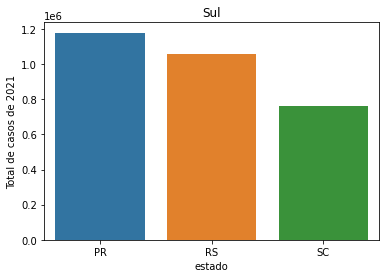

In [153]:
sns.barplot(x=sul_contagem.index, y=sul_contagem['Total de casos de 2021']).set_title('Sul')

Text(0.5, 1.0, 'Centro-Oeste')

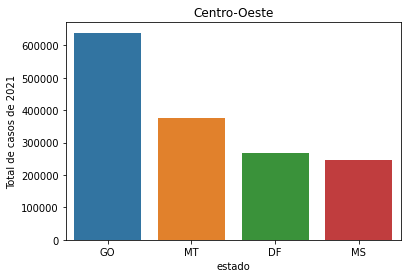

In [154]:
sns.barplot(x=co_contagem.index, y=co_contagem['Total de casos de 2021']).set_title('Centro-Oeste')

### Óbitos

Fiz o mesmo procedimento com os novos casos de infecção para descobrir o quantos óbitos ocorreram.

In [155]:
regioes_contagem_o = regioes_gerais[['regiao', 'obitosNovos']].groupby('regiao').agg(['sum', 'mean', 'max', 'median'])
nomeColunas(regioes_contagem_o)
regioes_contagem_o = regioes_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021', 'obitosNovos_mean':'Média de Óbitos', 'obitosNovos_max': 'Máx. Óbitos em um dia', 'obitosNovos_median': 'Mediana'})
regioes_contagem_o = regioes_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
regioes_contagem_o

,Total de Óbitos de 2021,Média de Óbitos,Máx. Óbitos em um dia,Mediana
regiao,,,,
Brasil,424107,746.667254,4249,314.5
Sudeste,205430,140.705479,1389,60.0
Sul,75420,68.876712,501,45.0
Nordeste,72271,22.000304,425,11.0
Centro-Oeste,41463,28.399315,254,18.0
Norte,29523,11.554990,225,4.0


In [156]:
regioes_int_o = regioes_contagem_o[1:]

In [157]:
sudeste_contagem_o = sudeste[['estado', 'obitosNovos']].groupby('estado').agg(['sum'])
nomeColunas(sudeste_contagem_o)
sudeste_contagem_o = sudeste_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021'})
sudeste_contagem_o = sudeste_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
sudeste_contagem_o

,Total de Óbitos de 2021
estado,
SP,108488
MG,44466
RJ,43937
ES,8049


In [158]:
sul_contagem_o = sul[['estado', 'obitosNovos']].groupby('estado').agg(['sum'])
nomeColunas(sul_contagem_o)
sul_contagem_o = sul_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021'})
sul_contagem_o = sul_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
sul_contagem_o

,Total de Óbitos de 2021
estado,
PR,32753
RS,27572
SC,14933


In [159]:
norte_contagem_o = norte[['estado', 'obitosNovos']].groupby('estado').agg(['sum'])
nomeColunas(norte_contagem_o)
norte_contagem_o = norte_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021'})
norte_contagem_o = norte_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
norte_contagem_o

,Total de Óbitos de 2021
estado,
PA,9901
AM,8550
RO,4886
TO,2705
RR,1282
AP,1097
AC,1056


In [160]:
nordeste_contagem_o = nordeste[['estado', 'obitosNovos']].groupby('estado').agg(['sum'])
nomeColunas(nordeste_contagem_o)
nordeste_contagem_o = nordeste_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021'})
nordeste_contagem_o = nordeste_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
nordeste_contagem_o

,Total de Óbitos de 2021
estado,
BA,18128
CE,14816
PE,10793
PB,5924
MA,5877
RN,4579
PI,4438
AL,3902
SE,3573


In [161]:
co_contagem_o = centro_oeste[['estado', 'obitosNovos']].groupby('estado').agg(['sum'])
nomeColunas(co_contagem_o)
co_contagem_o = co_contagem_o.rename(columns={'obitosNovos_sum': 'Total de Óbitos de 2021'})
co_contagem_o = co_contagem_o.sort_values(by='Total de Óbitos de 2021', ascending=False)
co_contagem_o

,Total de Óbitos de 2021
estado,
GO,17873
MT,9342
MS,7399
DF,6849


In [269]:
viz_datas_o = regioes_gerais[['regiao', 'obitosNovos']]
viz_datas_o = viz_datas_o.pivot_table(values='obitosNovos', index=viz_datas_o.index, columns='regiao', aggfunc='first')
viz_datas_o = viz_datas_o.drop(labels='Brasil', axis=1)
viz_datas_o

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
data,,,,,
2021-01-01,18,6,5,99,19
2021-01-02,13,7,3,22,8
2021-01-03,12,5,7,14,27
2021-01-04,26,6,8,26,32
2021-01-05,33,7,12,20,95
...,...,...,...,...,...
2021-12-27,2,3,5,2,2
2021-12-28,3,2,5,8,2
2021-12-29,2,1,4,6,4


### Gráficos: Óbitos

Gráfico temporal de registro de óbitos

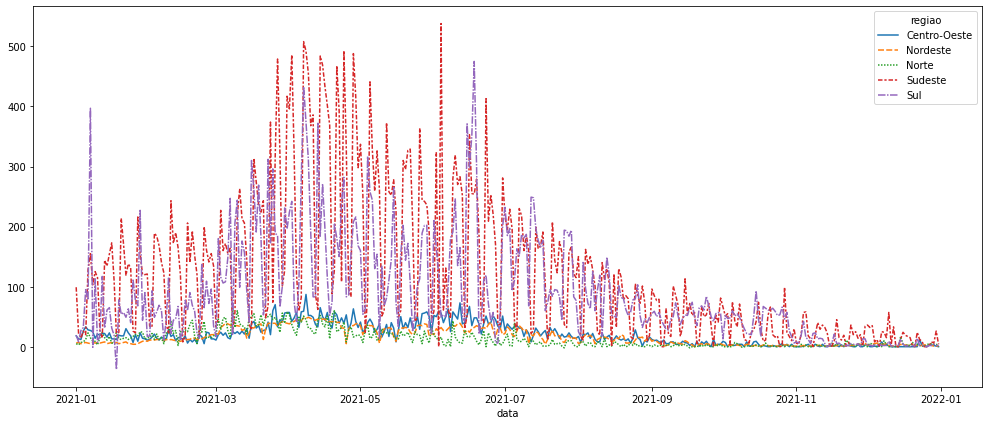

In [270]:
plt.figure(figsize=(17,7))
sns.lineplot(data=viz_datas_o)

Gráficos mostrando dados isolados de cada região

Text(0.5, 1.0, 'Regiões do Brasil')

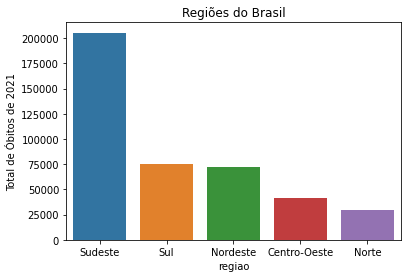

In [162]:
sns.barplot(x=regioes_int_o.index, y=regioes_int_o['Total de Óbitos de 2021']).set_title('Regiões do Brasil')

Text(0.5, 1.0, 'Sudeste')

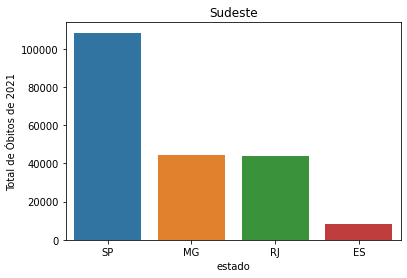

In [163]:
sns.barplot(x=sudeste_contagem_o.index, y=sudeste_contagem_o['Total de Óbitos de 2021']).set_title('Sudeste')

Text(0.5, 1.0, 'Sul')

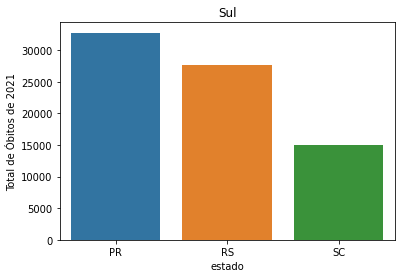

In [164]:
sns.barplot(x=sul_contagem_o.index, y=sul_contagem_o['Total de Óbitos de 2021']).set_title('Sul')

Text(0.5, 1.0, 'Nordeste')

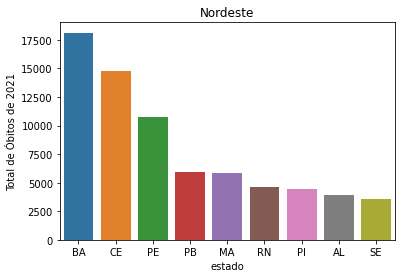

In [165]:
sns.barplot(x=nordeste_contagem_o.index, y=nordeste_contagem_o['Total de Óbitos de 2021']).set_title('Nordeste')

Text(0.5, 1.0, 'Norte')

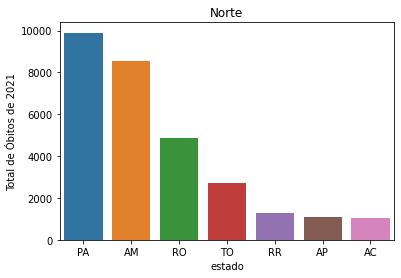

In [166]:
sns.barplot(x=norte_contagem_o.index, y=norte_contagem_o['Total de Óbitos de 2021']).set_title('Norte')

Text(0.5, 1.0, 'Centro-Oeste')

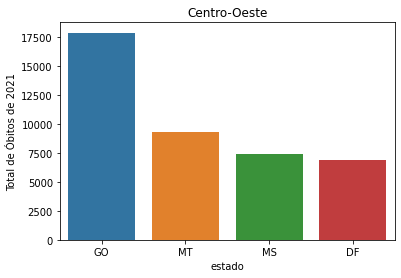

In [167]:
sns.barplot(x=co_contagem_o.index, y=co_contagem_o['Total de Óbitos de 2021']).set_title('Centro-Oeste')

### Hipóteses e Conclusões

- É possivel perceber que existe uma tendência de muitos registros de novos casos em regiões metropolitanas de cada parte do país. Isso se dá pelo acúmulo de pessoas que residem nesses lugares, grande movimentação, tráfego de pessoas e comércios.
- Regiões mais internas ou menos urbanas possuem uma menor taxa de registros, por ter uma população menor e menos movimentação.
- Maioria das regiões metropolitanas também possuem pontos túristicos, que instigam viagens e passeios, e isso acaba aumentando o risco de infecção. A região Sudeste do país sofreu muito com isso porque em épocas festivas e férias é comum pessoas viajarem para essa região.
- As regiões Sudeste e Sul foram as regiões com maior registro de novos casos e, por consequência, de óbitos do páis, por serem regiões mais escolhidas para viagens e moradias.
- Há uma tendência de grandes picos de infecção no começo do ano, e isso se dá por questões de épocas festivas como Natal e Ano Novo.